# Dataset Introduction

**Netflix** is one of the world's leading media and video streaming platforms, offering a vast collection of movies and TV shows across different genres. This dataset provides listings of movies and TV shows available on Netflix, along with details such as cast, directors, ratings, release year, duration, and genres.

This dataset was last updated in 2021 and reflects the content available on Netflix up to that period. While Netflix continuously updates its catalog, this dataset provides valuable insights into content distribution, trends, and patterns over time.

In [1]:
print("Dataset Name       : Netflix Movies & TV Shows Dataset")
print("Source             : Kaggle")
print("Number of Rows     : 8807")
print("Number of Columns  : 12")

Dataset Name       : Netflix Movies & TV Shows Dataset
Source             : Kaggle
Number of Rows     : 8807
Number of Columns  : 12


**Features included**
1. show_id: Unique ID for every Movie / Tv Show,
2. type: Whether it's a Movie or TV Show,
3. title: Name of the movie or TV show
4. director: Director(s) of the title
5. cast: Main actors in the title
6. country: Country where the movie / show was produced
7. date_added: Date when the content was added to Netflix
8. release_year: Actual Release year of the move / show
9. rating: TV Rating of the movie / show
10. duration: Total Duration - in minutes or number of seasons
11. listed_in: Genres associated with the title
12. description: Short summary of the content'''

# Project Goals

This project aims to analyze Netflix’s content library to:
- Understand content distribution across genres, ratings, and countries.
- Identify trends in content addition over time (Movies vs. TV Shows).
- Analyze movie durations & TV show seasons to uncover patterns.
- Examine content production trends across different countries.
- Find correlations between content type, duration, and genres.

# Importing libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Data Loading & Overview

## Load the Data set

In [3]:
data = pd.read_csv('netflix_titles.csv')

## Displaying basic information

In [4]:
data.shape

(8807, 12)

In [5]:
data.dtypes

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

In [6]:
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [8]:
# Since show_id is unique for each row. Setting that column as index
# data['show_id'].nunique(dropna=False) #8807
data.set_index('show_id',inplace=True)

# Handling Missing Values

## Identifying columns with missing values

In [9]:
data.isna().sum()

type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

*The following columns contain missing values*
- director
- cast
- country
- date_added
- rating
- duration

## Filling Missing Values

### Handling missing values in director, cast and country column

In [10]:
data['director'].isna().sum()

2634

In [11]:
data['cast'].isna().sum()

825

In [12]:
data['country'].isna().sum()

831

- There are **2634 NaN values** in director column, **825 NaN values** in cast column and **831 NaN values** in country column.
-  Missing cast,director or country values likely mean the cast/director/country information is unavailable, hence replacing them with "**Unknown**"

In [13]:
cols_to_fill = ['director', 'cast','country']
data[cols_to_fill] = data[cols_to_fill].fillna('Unknown')

In [14]:
# confirming that there are no NaN values
print(data['director'].isnull().sum())
print(data['cast'].isnull().sum())
print(data['country'].isnull().sum())

0
0
0


### Handling missing values in date_added column

In [15]:
data['date_added'].isna().sum()

10

- **10 missing values** were found in date_added.
- Decided not to fill missing values in date_added and keep them as NaT because:
  - Avoids introducing incorrect data: Using a placeholder like "1970-01-01" or the median date would be misleading since we do not know the actual date.
  - Preserves data integrity: Keeping NaT ensures that missing values are handled correctly in time-based analyses rather than being assumed.
  - Prevents conversion to object type: If we replace NaT with "Unknown", it will convert the column to object, making it harder to perform date-related operations.
  - Allows proper filtering and handling: Many Pandas functions and visualizations can handle NaT properly, making it a better choice for analysis.

In [16]:
# pd.to_datetime(data['date_added'])

In [17]:
# Running above code gave below error
# ValueError: time data " August 4, 2017" doesn't match format "%B %d, %Y", at position 1442
# Stripping these spaces before converting the column to datetime
data['date_added'] = data['date_added'].str.strip()

In [18]:
data['date_added'] = pd.to_datetime(data['date_added'])

### Handling missing values in rating column

In [19]:
data['rating'].isna().sum()

4

- The dataset has **4 missing values** in the rating column.
- Since "NR" (Not Rated) already exists as a valid category, NaN represents truly missing data rather than just an "unrated" status.
- Keeping NaN values as they are to preserve data integrity.

### Handling missing values in duration column

In [20]:
data['duration'].isna().sum()

3

In [21]:
data[data['duration'].isna()]

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
show_id,,,,,,,,,,,
s5542,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,2017-04-04,2017,74 min,NaN,Movies,"Louis C.K. muses on religion, eternal love, gi..."
s5795,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,2016-09-16,2010,84 min,NaN,Movies,Emmy-winning comedy writer Louis C.K. brings h...
s5814,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,2016-08-15,2015,66 min,NaN,Movies,The comic puts his trademark hilarious/thought...


- There were 3 missing values in the duration column.
- Since duration varies based on external data sources, we decided to keep them as NaN.
- Fetching correct values would require an external API (IMDb/TMDb), but for this dataset, it's a negligible issue.

# Data Cleaning & Preprocessing

## Checking for Duplicates

In [22]:
data[data.duplicated()]

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
show_id,,,,,,,,,,,


- All the rows are unique as of now.

## Fixing Inconsistent Formatting

In [23]:
# Removing leading and trailing spaces from object type columns
data = data.apply(lambda ser: ser.str.strip() if ser.dtype==object else ser)

## Standardizing Categorical Columns

In [24]:
# Some columns like type, rating, and listed_in should have consistent category names. Inpecting that:

In [25]:
data['type'].unique()

array(['Movie', 'TV Show'], dtype=object)

No cleaning needed here.

In [26]:
data['rating'].unique()

array(['PG-13', 'TV-MA', 'PG', 'TV-14', 'TV-PG', 'TV-Y', 'TV-Y7', 'R',
       'TV-G', 'G', 'NC-17', '74 min', '84 min', '66 min', 'NR', nan,
       'TV-Y7-FV', 'UR'], dtype=object)

- The rating column contains various categories, including "NR" (Not Rated) and "UR" (Unrated).
- NR (Not Rated): The movie/show was never submitted for a rating.
- UR (Unrated): There might be a rated version, but this particular version does not have a rating.
- Since these terms have distinct meanings, we are keeping them as separate categories rather than merging them.

Some values in rating column ("74 min", "84 min", "66 min") do not belong  and should be in duration.
Moving them to the correct column (duration) and replacing them with NaN in rating.
This ensures data consistency and prevents misleading analysis.

In [27]:
# Identifying rows where rating column has numeric duration values
mask = data['rating'].str.contains(r'^\d', regex=True,na=False)

# Move incorrect values from rating to duration
data.loc[mask, 'duration'] = data.loc[mask,'rating']

# Replace incorrect values in rating with NaN
data.loc[mask,'rating'] = np.nan

In [28]:
data['rating'].value_counts(dropna=False)

rating
TV-MA       3207
TV-14       2160
TV-PG        863
R            799
PG-13        490
TV-Y7        334
TV-Y         307
PG           287
TV-G         220
NR            80
G             41
NaN            7
TV-Y7-FV       6
NC-17          3
UR             3
Name: count, dtype: int64

In [30]:
data['listed_in'].nunique()

514

- Since the **listed_in** column contains multiple genres separated by commas, we need to check whether any genre has **leading or trailing spaces**.

In [31]:
data[data['listed_in'].apply(lambda genres: any(genre != genre.strip() for genre in genres.split(',')))]['listed_in']

show_id
s2         International TV Shows, TV Dramas, TV Mysteries
s3       Crime TV Shows, International TV Shows, TV Act...
s4                                  Docuseries, Reality TV
s5       International TV Shows, Romantic TV Shows, TV ...
s6                      TV Dramas, TV Horror, TV Mysteries
                               ...                        
s8803                       Cult Movies, Dramas, Thrillers
s8804               Kids' TV, Korean TV Shows, TV Comedies
s8805                              Comedies, Horror Movies
s8806                   Children & Family Movies, Comedies
s8807       Dramas, International Movies, Music & Musicals
Name: listed_in, Length: 6787, dtype: object

 - To ensure consistency, stripping leading and trailing spaces from each genre in the listed_in column.

In [32]:
data['listed_in'] = data['listed_in'].apply(lambda genres : ",".join(genre.strip() for genre in genres.split(',')))

In [34]:
data['listed_in'].nunique()

514

- Extracting all unique genres from the listed_in column by splitting each entry at commas and collecting them into a set.

In [35]:
unique_genre = set()
data['listed_in'].apply(lambda genres: unique_genre.update(genres.split(',')))
unique_genre

{'Action & Adventure',
 'Anime Features',
 'Anime Series',
 'British TV Shows',
 'Children & Family Movies',
 'Classic & Cult TV',
 'Classic Movies',
 'Comedies',
 'Crime TV Shows',
 'Cult Movies',
 'Documentaries',
 'Docuseries',
 'Dramas',
 'Faith & Spirituality',
 'Horror Movies',
 'Independent Movies',
 'International Movies',
 'International TV Shows',
 "Kids' TV",
 'Korean TV Shows',
 'LGBTQ Movies',
 'Movies',
 'Music & Musicals',
 'Reality TV',
 'Romantic Movies',
 'Romantic TV Shows',
 'Sci-Fi & Fantasy',
 'Science & Nature TV',
 'Spanish-Language TV Shows',
 'Sports Movies',
 'Stand-Up Comedy',
 'Stand-Up Comedy & Talk Shows',
 'TV Action & Adventure',
 'TV Comedies',
 'TV Dramas',
 'TV Horror',
 'TV Mysteries',
 'TV Sci-Fi & Fantasy',
 'TV Shows',
 'TV Thrillers',
 'Teen TV Shows',
 'Thrillers'}

In [36]:
len(unique_genre)

42

- After extracting unique genres, all values appear correct and properly standardized. No inconsistencies were found in genre names.

In [37]:
data['release_year'].unique()

array([2020, 2021, 1993, 2018, 1996, 1998, 1997, 2010, 2013, 2017, 1975,
       1978, 1983, 1987, 2012, 2001, 2014, 2002, 2003, 2004, 2011, 2008,
       2009, 2007, 2005, 2006, 1994, 2015, 2019, 2016, 1982, 1989, 1990,
       1991, 1999, 1986, 1992, 1984, 1980, 1961, 2000, 1995, 1985, 1976,
       1959, 1988, 1981, 1972, 1964, 1945, 1954, 1979, 1958, 1956, 1963,
       1970, 1973, 1925, 1974, 1960, 1966, 1971, 1962, 1969, 1977, 1967,
       1968, 1965, 1946, 1942, 1955, 1944, 1947, 1943], dtype=int64)

In [38]:
data['duration'] = data['duration'].str.lower()

In [39]:
data['duration'].unique()

array(['90 min', '2 seasons', '1 season', '91 min', '125 min',
       '9 seasons', '104 min', '127 min', '4 seasons', '67 min', '94 min',
       '5 seasons', '161 min', '61 min', '166 min', '147 min', '103 min',
       '97 min', '106 min', '111 min', '3 seasons', '110 min', '105 min',
       '96 min', '124 min', '116 min', '98 min', '23 min', '115 min',
       '122 min', '99 min', '88 min', '100 min', '6 seasons', '102 min',
       '93 min', '95 min', '85 min', '83 min', '113 min', '13 min',
       '182 min', '48 min', '145 min', '87 min', '92 min', '80 min',
       '117 min', '128 min', '119 min', '143 min', '114 min', '118 min',
       '108 min', '63 min', '121 min', '142 min', '154 min', '120 min',
       '82 min', '109 min', '101 min', '86 min', '229 min', '76 min',
       '89 min', '156 min', '112 min', '107 min', '129 min', '135 min',
       '136 min', '165 min', '150 min', '133 min', '70 min', '84 min',
       '140 min', '78 min', '7 seasons', '64 min', '59 min', '139 min',
    

- Since duration contains both minutes (for movies) and seasons (for TV shows),splitting them into two new columns

In [40]:
data['num_seasons'] = data['duration'].str.extract(r"(\d+)\s*season").astype(float)

In [41]:
data['duration_min'] = data['duration'].str.extract(r'(\d+)\s*min').astype(float)

In [42]:
# dropping duration column
data.drop(columns=['duration'], inplace=True)

Since a title is either a **Movie** (with `duration_min`) or a **TV Show** (with `num_seasons`), missing values can be filled accordingly:  

- **Movies** will have `num_seasons = 0` (since they are not TV shows).  
- **TV Shows** will have `duration_min = 0` (since they don't have a duration in minutes).

In [43]:
data['duration_min'] = data['duration_min'].fillna(0)
data['num_seasons'] = data['num_seasons'].fillna(0)

In [44]:
data[['num_seasons', 'duration_min']].isna().sum()


num_seasons     0
duration_min    0
dtype: int64

# Exploratory Data Analysis (EDA)

## Overview of the Dataset

### Displaying the first few rows of the dataset.

In [45]:
data.head(10)

,type,title,director,cast,country,date_added,release_year,rating,listed_in,description,num_seasons,duration_min
show_id,,,,,,,,,,,,
s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,2021-09-25,2020,PG-13,Documentaries,"As her father nears the end of his life, filmm...",0.0,90.0
s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,"International TV Shows,TV Dramas,TV Mysteries","After crossing paths at a party, a Cape Town t...",2.0,0.0
s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,2021-09-24,2021,TV-MA,"Crime TV Shows,International TV Shows,TV Actio...",To protect his family from a powerful drug lor...,1.0,0.0
s4,TV Show,Jailbirds New Orleans,Unknown,Unknown,Unknown,2021-09-24,2021,TV-MA,"Docuseries,Reality TV","Feuds, flirtations and toilet talk go down amo...",1.0,0.0
s5,TV Show,Kota Factory,Unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,"International TV Shows,Romantic TV Shows,TV Co...",In a city of coaching centers known to train I...,2.0,0.0
s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",Unknown,2021-09-24,2021,TV-MA,"TV Dramas,TV Horror,TV Mysteries",The arrival of a charismatic young priest brin...,1.0,0.0
s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",Unknown,2021-09-24,2021,PG,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...,0.0,91.0
s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...",2021-09-24,1993,TV-MA,"Dramas,Independent Movies,International Movies","On a photo shoot in Ghana, an American model s...",0.0,125.0
s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,2021-09-24,2021,TV-14,"British TV Shows,Reality TV",A talented batch of amateur bakers face off in...,9.0,0.0


### summary statistics

In [46]:
data.describe()

,date_added,release_year,num_seasons,duration_min
count,8797,8807.000000,8807.000000,8807.000000
mean,2019-05-17 05:59:08.436967168,2014.180198,0.536278,69.312252
min,2008-01-01 00:00:00,1925.000000,0.000000,0.000000
25%,2018-04-06 00:00:00,2013.000000,0.000000,0.000000
50%,2019-07-02 00:00:00,2017.000000,0.000000,88.000000
75%,2020-08-19 00:00:00,2019.000000,1.000000,106.000000
max,2021-09-25 00:00:00,2021.000000,17.000000,312.000000
std,NaN,8.819312,1.191620,51.519154


**Observations from Summary Statistics**
1. *Release Year*
   - Oldest content is from 1925, while the most recent is 2021.
   - Most content (median: 2017) is relatively recent.
2. *Number of Seasons*
   - Majority of entries have 0 seasons, confirming that many are movies.
   - Max value is 17 seasons, likely long-running TV shows.
3. *Duration (Minutes)*
   - Median duration: 88 minutes (typical for movies).
   - Max duration: 312 minutes, which could be long movies or special content.
   - A significant portion has 0 minutes (likely TV shows, since we assigned 0 for missing values).
4. *Date Added*
   - Most content was added between 2018 and 2021 (based on quartiles).

### Unique Values and Duplicate Analysis

In [47]:
data.select_dtypes(include='object').nunique()

type              2
title          8806
director       4529
cast           7693
country         749
rating           14
listed_in       514
description    8775
dtype: int64

**Observations from Unique Values Analysis**
1. Type: There are only two unique values ("Movie" and "TV Show").
2. Title: Almost all titles are unique (8806 out of 8807), meaning each entry mostly represents a distinct show or movie.
3. Director: There are 4529 unique directors, suggesting that many directors have multiple works on the platform.
4. Cast: With 7693 unique values, the cast column is highly diverse, but since it contains combinations of actors, it doesn't directly reflect the number of distinct actors.
5. Country: There are 749 unique countries, indicating a wide geographic diversity in content.
6. Rating: Only 14 unique ratings, implying that the platform uses a fixed set of rating categories.
7. Listed In (Genres): There are 514 unique genre combinations, showing that content is categorized under multiple genres.
8. Description: While mostly unique (8775 values), a few descriptions might be reused or very similar.

**Special observation on title**
- Seems like one of the title is duplicate. This must have likely resulted from earlier data cleaning (e.g., trimming whitespace). Removing this row to maintain data integrity.

In [48]:
# Duplicate entry identified
data[data.duplicated(keep=False)]

,type,title,director,cast,country,date_added,release_year,rating,listed_in,description,num_seasons,duration_min
show_id,,,,,,,,,,,,
s3372,Movie,Consequences,Ozan Açıktan,"Nehir Erdoğan, Tardu Flordun, İlker Kaleli, Se...",Turkey,2019-10-25,2014,TV-MA,"Dramas,International Movies,Thrillers",Secrets bubble to the surface after a sensual ...,0.0,106.0
s6530,Movie,Consequences,Ozan Açıktan,"Nehir Erdoğan, Tardu Flordun, İlker Kaleli, Se...",Turkey,2019-10-25,2014,TV-MA,"Dramas,International Movies,Thrillers",Secrets bubble to the surface after a sensual ...,0.0,106.0


- Initially, when we checked for duplicates using data.duplicated(), no duplicates were found.
- However, after performing data cleaning (like trimming spaces, standardizing text, etc.), one duplicate row appeared.
- This likely happened because inconsistencies in formatting had previously made it appear as two different records.
- Since duplicates can lead to biased analysis, removing duplicate to ensure data integrity using drop_duplicates().

In [49]:
data = data.drop_duplicates()

In [50]:
data.shape

(8806, 12)

In [51]:
data[data.duplicated()]

,type,title,director,cast,country,date_added,release_year,rating,listed_in,description,num_seasons,duration_min
show_id,,,,,,,,,,,,


## Understanding Numerical Features

### Distribution of Movie Durations

In [52]:
plt.style.use('fivethirtyeight')

In [53]:
movie_durations = data[data['type']=='Movie']['duration_min']

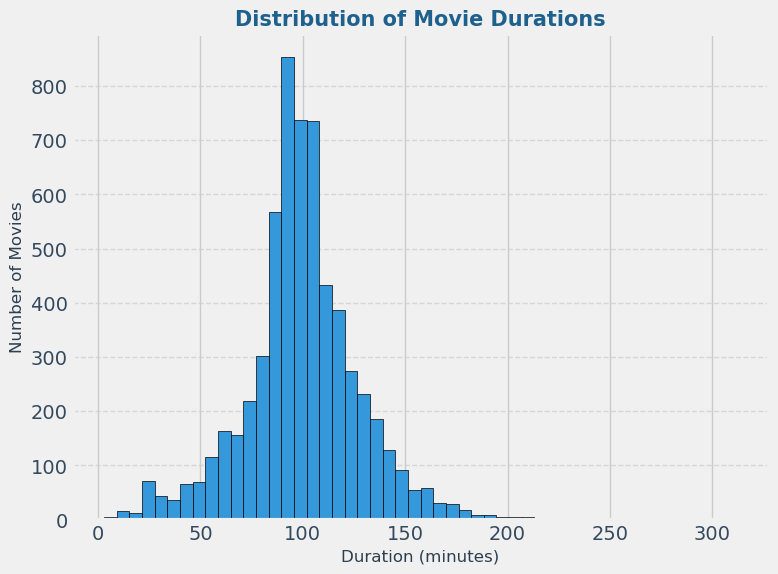

In [54]:
plt.figure(figsize=(8,6))
plt.hist(movie_durations, bins=50,color='#3498db', edgecolor='black')
plt.title('Distribution of Movie Durations', fontsize=15,fontweight='bold', color='#1f618d')
plt.xlabel('Duration (minutes)', fontsize=12, color = '#2c3e50')
plt.ylabel('Number of Movies', fontsize=12,color = '#2c3e50')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(color='#34495e')
plt.yticks(color='#34495e')

plt.show()

**Observations**
- Most common movie duration range: The highest bar appears between 85 and 100 minutes, meaning most movies fall within this duration.
- General shape of the distribution: The histogram is right-skewed, with most movies clustered around 90–100 minutes, and a few long-duration movies extending beyond 200 minutes.
- Outliers: There are a few extreme values beyond 250 minutes, indicating some exceptionally long movies.
- Approximate average movie duration: Most movies seem to be around 90–100 minutes, so the average should be close to this range.
- Spread of data: The data is concentrated around 85–110 minutes, with fewer movies lasting beyond 150 minutes.

### Distribution of Number of Seasons (TV Shows)

In [55]:
show_seasons = data[data['type']=='TV Show']['num_seasons']

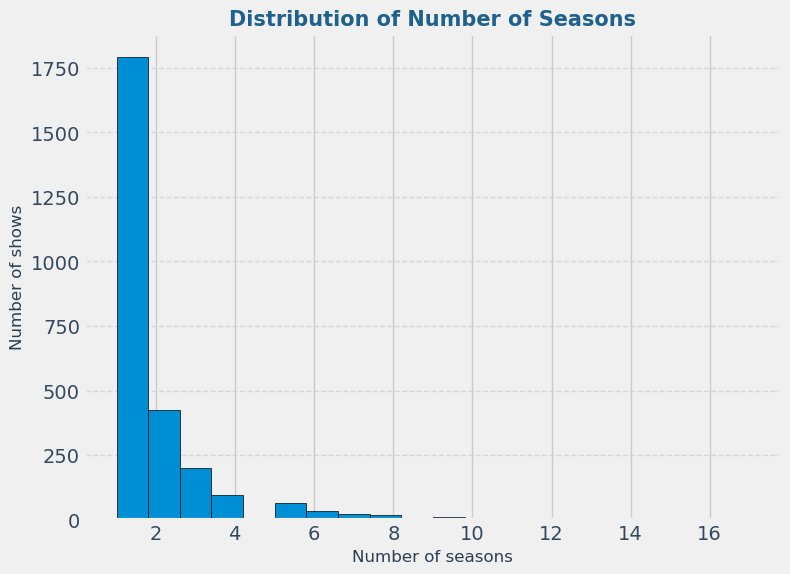

In [56]:
plt.figure(figsize=(8,6))
plt.hist(show_seasons,bins=20, edgecolor='black')
plt.title('Distribution of Number of Seasons', fontsize=15, fontweight='bold',  color='#1f618d')
plt.xlabel('Number of seasons', fontsize=12, color = '#2c3e50')
plt.ylabel('Number of shows', fontsize=12, color = '#2c3e50')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(color='#34495e')
plt.yticks(color='#34495e')

plt.show()

**Observations**
- Most TV Shows Have Only 1 Season – The highest bar is at 1 season, showing that the majority of TV shows in the dataset are limited series or short-lived.
- Declining Trend with More Seasons – The number of shows significantly drops as the season count increases, meaning long-running series are less common.
- Very Few Shows Have More Than 5 Seasons – Only a handful of TV shows continue beyond 5 seasons, making them rare.
- Outliers Exist – A few shows have exceptionally high season counts (8+), indicating long-standing series but in very low numbers.

## Trends Over Time

### Content Added Over Time 

In [57]:
# Movies and TV shows added over years
movie_added_years = data[data['type'] == 'Movie']['date_added'].dt.year.value_counts().sort_index()
show_added_years = data[data['type'] == 'TV Show']['date_added'].dt.year.value_counts().sort_index()

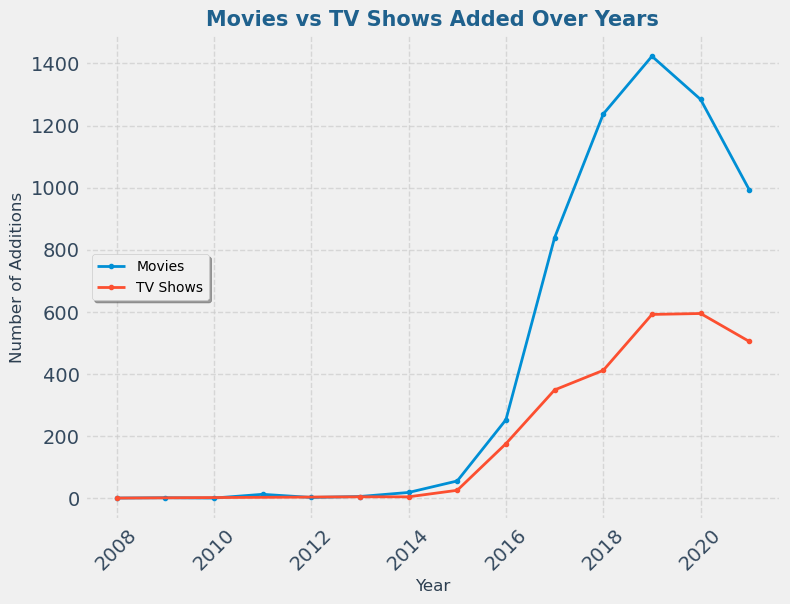

In [58]:
plt.figure(figsize=(8,6))
plt.plot(movie_added_years,marker='o',label='Movies',lw=2,ms=3)
plt.plot(show_added_years,marker='o',label='TV Shows',lw=2,ms=3)
plt.title('Movies vs TV Shows Added Over Years', fontsize=15, fontweight='bold', color='#1f618d')
plt.xlabel('Year', fontsize=12, color = '#2c3e50')
plt.ylabel('Number of Additions', fontsize=12, color = '#2c3e50')
plt.xticks(rotation=45, color='#34495e')
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(loc='center left', fontsize=10, shadow=True)
plt.yticks(color='#34495e')
plt.show()

**Observations**
1. Sharp Rise After 2015:
   - Both Movies and TV Shows saw a major increase after 2015.
   - Netflix significantly ramped up content additions, possibly due to its expansion into original content and global markets.
2. Movies Were Added More Rapidly:
   - The number of movies added grew at a much faster rate compared to TV shows.
   - The peak movie additions occurred around 2019, reaching over 1400.
3. TV Shows Followed a Steady Growth:
   - The number of TV shows added increased but at a slower rate than movies.
   - The peak was around 2019-2020, reaching close to 600.
4. Decline in 2020:
   - Both movies and TV shows saw a decline in 2020.
   - This might be due to COVID-19 production delays affecting new releases.
5. Pre-2015: Very Few Additions:
   - Before 2015, the number of additions for both categories was minimal.
   - Netflix's streaming service was still evolving, and licensing agreements were fewer.

**Insights**
1. Netflix focused heavily on movies more than TV shows.
2. The rapid increase post-2015 suggests a content expansion strategy.
3. The COVID-19 impact is visible in 2020 with fewer additions.

### Distribution of Release Years

In [59]:
movie_counts = data[data['type'] == 'Movie']['release_year'].value_counts().sort_index()
show_counts = data[data['type'] == 'TV Show']['release_year'].value_counts().sort_index()

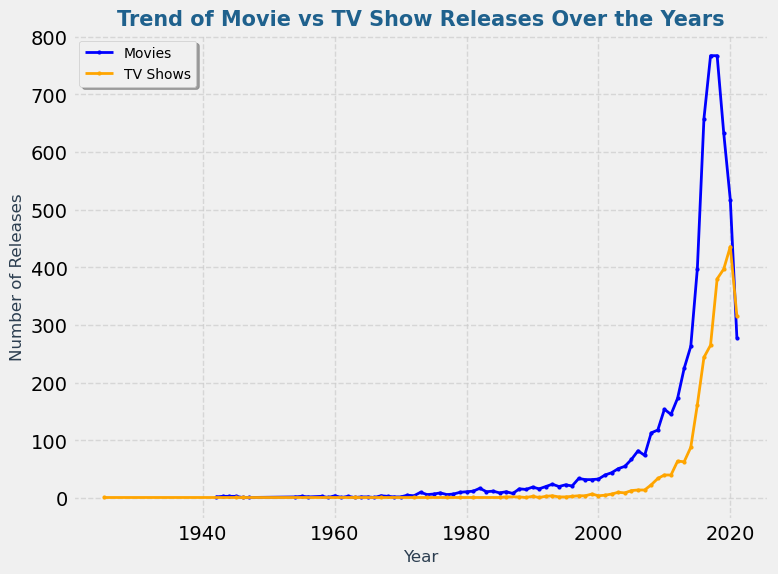

In [60]:
plt.figure(figsize=(8,6))
plt.plot(movie_counts.index, movie_counts.values, marker='o', linestyle='-', label="Movies", color="blue",lw=2,ms=2)
plt.plot(show_counts.index, show_counts.values, marker='o', linestyle='-', label="TV Shows", color="orange",lw=2,ms=2)
plt.xlabel("Year",fontsize=12, color = '#2c3e50')
plt.ylabel("Number of Releases",fontsize=12, color = '#2c3e50')
plt.title("Trend of Movie vs TV Show Releases Over the Years", fontsize=15, fontweight='bold', color='#1f618d')
plt.legend(shadow=True,fontsize=10)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

**Observations**
1. Most Content in Netflix’s Catalog Comes from the 2010s and Later – The majority of movies and TV shows in Netflix's library were originally released in the last 10-15 years, meaning Netflix focuses on modern content.
2. Very Few Titles from Before 1980 – Netflix has very few older movies or TV shows, indicating that it does not acquire a lot of classic content from early decades.
3. Gradual Increase in Titles from 1980 to 2010 – The number of movies and TV shows in the Netflix catalog from this period slowly increased, though not as significantly as the more recent years.
4. Large Spike in Content from 2015-2020 – A major portion of Netflix’s catalog consists of movies and TV shows that were originally released between 2015 and 2020. This suggests that Netflix either licenses or produces mostly newer content.
5. Movies Outnumber Older TV Shows – In earlier decades (pre-2010), there are more movies than TV shows in Netflix’s catalog, possibly because older TV shows have licensing restrictions or are not as popular.
6. TV Shows Became More Common After 2015 – The number of TV shows in Netflix’s catalog from recent years is much higher, which aligns with Netflix’s focus on original TV series.
7. Sharp Drop in Post-2020 Titles – Fewer movies and TV shows are present from 2021 onward, likely due to pandemic-related production delays, changing licensing strategies, or Netflix’s shift toward fewer but high-budget productions.

**Key Insights**
- Netflix’s content catalog consists mostly of titles released after 2010.
- Older movies & TV shows are fewer in number, indicating Netflix focuses on newer content rather than classic releases.
- The post-2020 decline could indicate reduced content production, shifting priorities, or changes in licensing strategies.

## Analyzing Categorical Features

### Popular Genres (listed_in)

In [61]:
all_genres = data['listed_in'].str.split(',').explode().str.strip()
top_five_genres = all_genres.value_counts().nlargest(5)

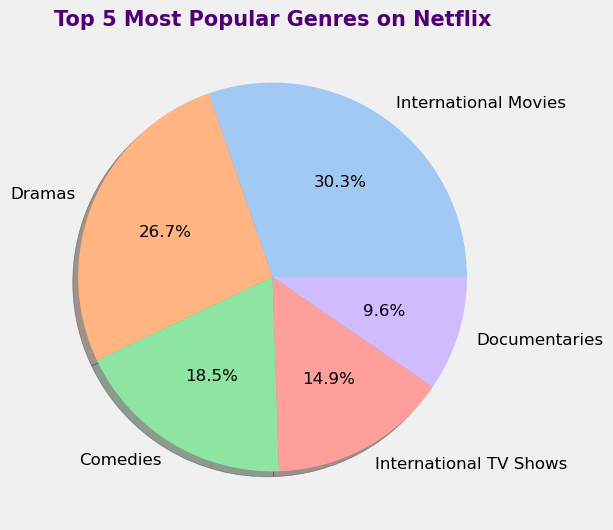

In [62]:
plt.figure(figsize=(8,6))

plt.pie(
    top_five_genres,
    labels=top_five_genres.index,
    autopct='%.1f%%',
    colors=sns.color_palette('pastel'),
    shadow=True,
    textprops={'fontsize':12}
)
plt.title('Top 5 Most Popular Genres on Netflix',fontsize=15, fontweight='bold', color= '#500073')
plt.show()

**Observations**
1. International Movies dominate the catalog (30.3%)
   - Netflix has a strong focus on global content, licensing and producing international films to appeal to worldwide audiences.
   - This aligns with Netflix's expansion into markets like India, Korea, and Latin America.
2️. Dramas are the second most common genre (26.7%)
   - Dramas tend to be versatile and widely consumed across different cultures.
   - This includes a mix of Hollywood, Bollywood, K-Dramas, and European films.
3️. Comedies hold a significant share (18.5%)
   - Netflix invests heavily in comedy movies and stand-up specials.
   - Comedies are popular in most regions and appeal to a broad audience.
4️. International TV Shows are growing (14.9%)
   - Like international movies, TV shows from different regions (e.g., K-dramas, Spanish-language series) are becoming a key part of Netflix's content strategy.
   - Suggests that Netflix is expanding non-English content, driven by audience demand.
5️. Documentaries make up a smaller but significant portion (9.6%)
  - While less dominant, Netflix has a strong presence in high-quality documentaries.

**Insights**
- Netflix is heavily focused on international content.
- Dramas & Comedies dominate, showing that Netflix prioritizes emotionally engaging and entertaining content.
- Documentaries, though smaller in proportion, are still a strong segment, indicating that Netflix caters to niche audiences too.

### Rating Distribution (rating)

In [63]:
rating_counts = data['rating'].value_counts()

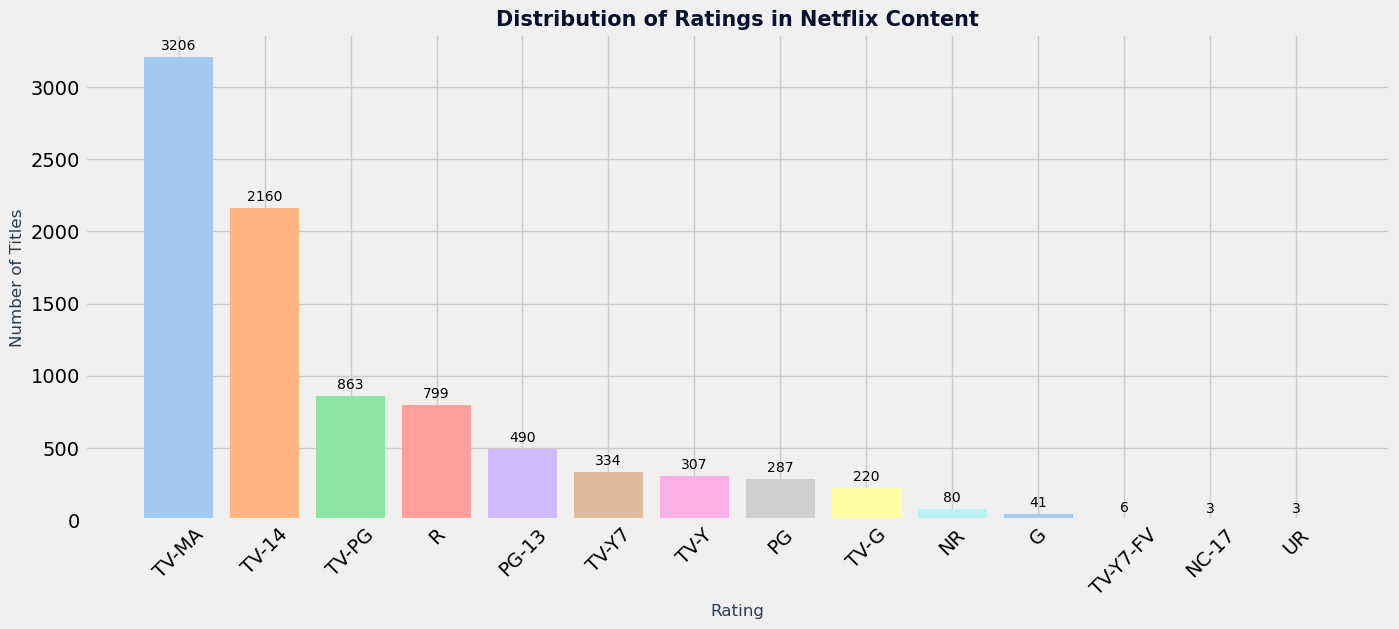

In [64]:
plt.figure(figsize=(15,6))
plt.bar(rating_counts.index,rating_counts.values,color=sns.color_palette('pastel'))
plt.xlabel("Rating",fontsize=12, color = '#2c3e50')
plt.ylabel("Number of Titles",fontsize=12, color = '#2c3e50')
plt.title("Distribution of Ratings in Netflix Content",fontsize=15, fontweight='bold',color='#09122C')
plt.xticks(rotation=45)
for i, v in enumerate(rating_counts.values):
    plt.text(i, v+50 , str(v), ha='center', fontsize=10)
#     plt.
plt.show()

**Rating description**

TV-Y: This program is designed to be appropriate for all children.

TV-Y7: This program is designed for children age 7 and above.

TV-G: This program is suitable for all ages.

TV-PG: This program contains material that parents may find unsuitable for younger children (hence, Parental Guidance)

TV-14: This program contains some material that many parents would find unsuitable for children under 14 years of age.

TV-MA: This program is specifically designed to be viewed by adults and therefore may be unsuitable for children under 17.

G: This program is suitable for all ages.

NC-17: unsuitable for children under 17.

NR: not rated.

PG: may find unsuitable for younger children. I would say it is the same as TV-PG

PG-13: for children over 13.

R: restricted, only for children over 12.

TV-Y7-FV: Fantasy violence (exclusive to the TV-Y7 rating)

UR: not rated, as in (unrated).

 **Observations**
1. Mature Content Dominates: TV-MA (3206) & TV-14 (2160) are the most common, showing Netflix targets adult & teen audiences.
2. Moderate Content Presence: PG-13 (490), TV-PG (863), R (799) indicate a mix of family-friendly & mature content.
3. Limited Kids' Content: TV-Y (307), G (41), TV-Y7 (334) are much fewer, meaning Netflix prioritizes older audiences.
4. Rare Ratings:
   - NR (80) & UR (3) → Some content was never officially rated.
   - NC-17 (3 titles) → Netflix avoids highly restricted content.

**Key takeaway**
- Netflix prioritizes mature & teen-friendly content over kids' programming. Most content is properly rated.

### Top Countries Producing Content

In [65]:
top_countries = data['country'].str.split(',').explode().str.strip().value_counts().nlargest(10)

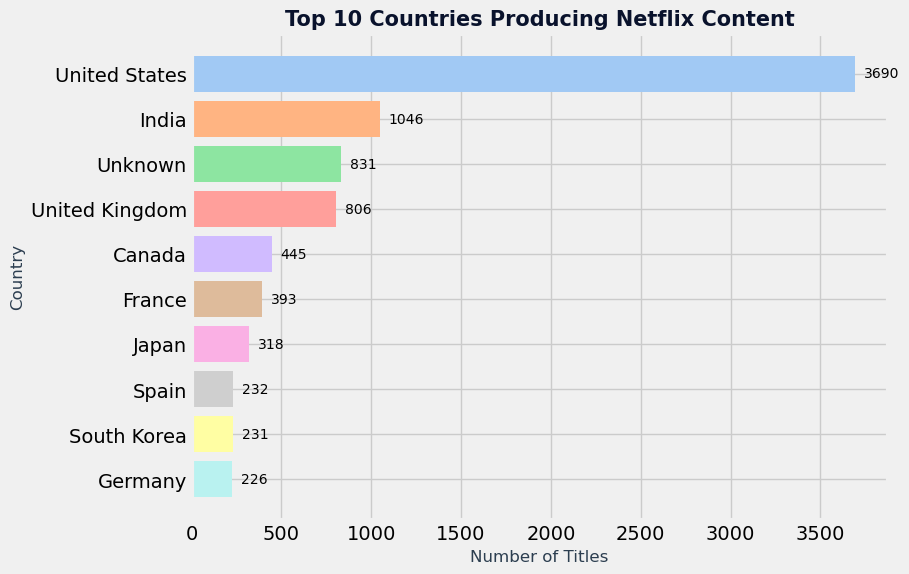

In [66]:
plt.figure(figsize=(8,6))
colors = sns.color_palette("pastel", len(top_countries))
bars = plt.barh(top_countries.index,top_countries.values,color=colors)
for bar in bars:
    plt.text(bar.get_width()+50, bar.get_y()+bar.get_height()/2, str(bar.get_width()),ha='left',va='center', fontsize=10)
plt.gca().invert_yaxis()
plt.title('Top 10 Countries Producing Netflix Content', fontsize=15, fontweight='bold', color='#09122C')
plt.xlabel('Number of Titles', fontsize=12, color = '#2c3e50')
plt.ylabel('Country', fontsize=12, color = '#2c3e50')


plt.show()

**Observations**
1. United States Dominates Netflix Content:
   - The United States produces the largest share of content, with a significant lead over all other countries.
2. India is the Second-Largest Contributor:
   - India ranks second, showing Netflix’s growing investment in the Indian entertainment industry.
3. Significant Amount of Content Has No Country Information (Unknown)
   - A large portion of content (831 titles) comes from countries whose data is unavailable.
   - Understanding these missing regions is crucial, as they represent a major share of Netflix’s catalog
5. Strong Presence of English-Speaking Countries
   - Countries like the United Kingdom, Canada, and Australia are among the top contributors, reinforcing Netflix’s focus on English-language content.
6. France, Japan & South Korea Lead in Non-English Content
  - France contributes significantly, likely due to French cinema.
  - Japan’s presence suggests anime & J-dramas are an important category.
  - South Korea’s contribution is likely driven by the popularity of K-Dramas & K-Movies.
6. Global Diversity in Netflix’s Library
  - While the US dominates, Netflix still features diverse content from Europe (UK, France, Germany, Spain), Asia (Japan, South Korea, India), and beyond.

**Key Takeaway**
- Netflix remains US-centric, but India, Japan, South Korea, and European nations are growing contributors. Additionally, the significant portion of content with missing country data suggests a need to better track global production sources.

# Relationships & Correlations

## Duration vs. Genre

In [67]:
df = data[data['type']=='Movie'][['listed_in','duration_min']]
df = df.assign(listed_in = df['listed_in'].str.split(',')).explode('listed_in')

In [68]:
avg_duration_by_genre = df.groupby('listed_in')['duration_min'].mean().sort_values(ascending=False).head(10)

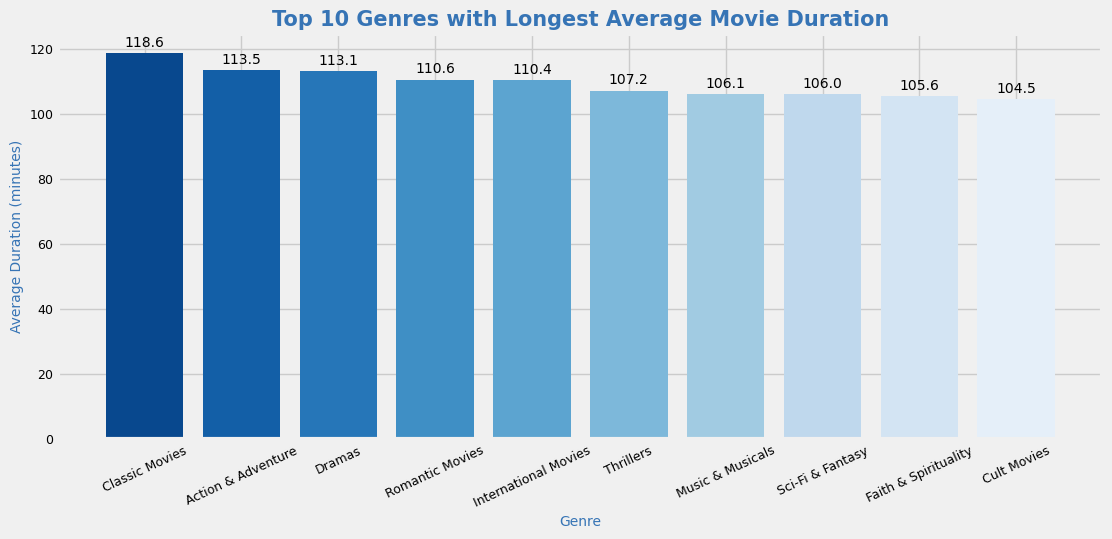

In [69]:
plt.figure(figsize=(12,5))
colors = sns.color_palette("Blues_r", len(avg_duration_by_genre))
plt.bar(avg_duration_by_genre.index,avg_duration_by_genre.values,color=colors)
plt.xticks(rotation=25,fontsize=9)
plt.yticks(fontsize=9)
plt.xlabel('Genre',fontsize=10,color='#3674B5')
plt.ylabel('Average Duration (minutes)',fontsize=10,color='#3674B5')
plt.title('Top 10 Genres with Longest Average Movie Duration',fontsize=15,fontweight='bold', color='#3674B5')
for x,v in enumerate(avg_duration_by_genre.values):
    plt.text(x,v+2,f"{v:.1f}",ha='center',fontsize=10)
    
plt.show()

**Observations**
- Classic Movies have the longest average duration (~118.6 mins), followed by Action & Adventure and Dramas (~113 mins).
- Romantic Movies, International Movies, and Thrillers also tend to have longer durations (~110-107 mins).
- Cult Movies have the shortest among the top 10 (~104.5 mins), but still longer than many other genres.
- Action & Adventure and Dramas being high on the list suggests that these genres involve detailed storytelling or complex plots requiring more screen time.
- Sci-Fi & Fantasy and Music & Musicals also rank high, likely due to world-building and performance elements.

**Key Takeaway**
- Genres with rich narratives, action, or artistic elements tend to have longer durations on Netflix.

## Seasons vs. Genre (For TV Shows)

In [70]:
df = data[data['type']=='TV Show'][['listed_in','num_seasons']]
df = df.assign(listed_in = df['listed_in'].str.split(',')).explode('listed_in')

In [71]:
avg_num_of_seasons_by_genre = df.groupby('listed_in')['num_seasons'].mean().sort_values(ascending=False).head(10)
avg_num_of_seasons_by_genre

listed_in
Classic & Cult TV        5.678571
TV Sci-Fi & Fantasy      2.654762
TV Action & Adventure    2.398810
Teen TV Shows            2.246377
TV Mysteries             2.193878
TV Comedies              2.151463
TV Horror                2.106667
TV Thrillers             2.052632
Kids' TV                 1.977827
TV Dramas                1.850590
Name: num_seasons, dtype: float64

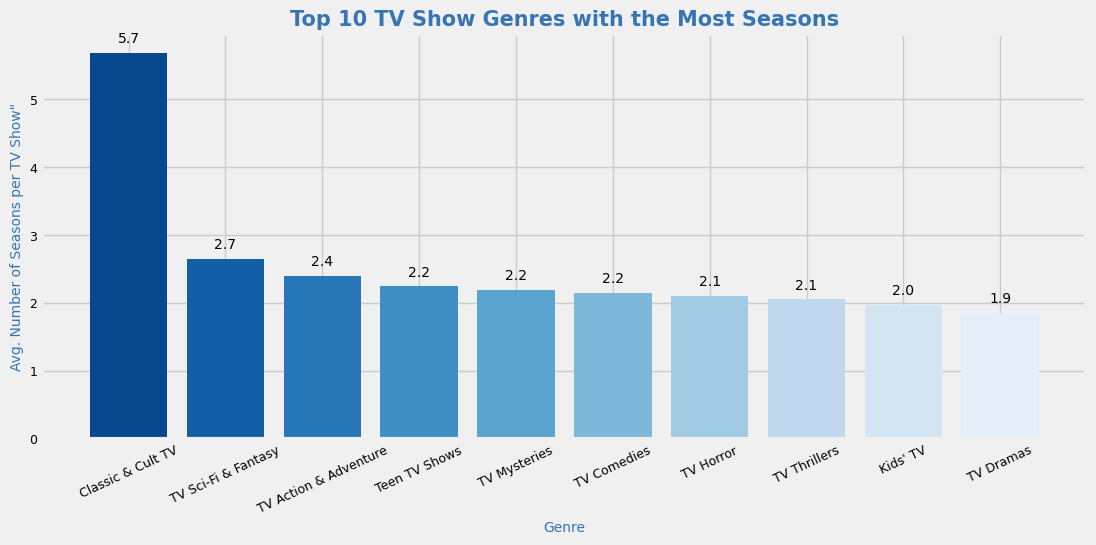

In [72]:
plt.figure(figsize=(12,5))
colors = sns.color_palette("Blues_r", len(avg_num_of_seasons_by_genre))
plt.bar(avg_num_of_seasons_by_genre.index,avg_num_of_seasons_by_genre.values,color=colors)
plt.xticks(rotation=25,fontsize=9)
plt.yticks(fontsize=9)
plt.xlabel('Genre',fontsize=10,color='#3674B5')
plt.ylabel('Avg. Number of Seasons per TV Show"',fontsize=10,color='#3674B5')
plt.title('Top 10 TV Show Genres with the Most Seasons',fontsize=15,fontweight='bold',color='#3674B5')
for x,v in enumerate(avg_num_of_seasons_by_genre.values):
    plt.text(x,v+.15,f"{v:.1f}",ha='center',fontsize=10)
    
plt.show()

**Observations**
- Classic & Cult TV has the highest average seasons (~5.7), indicating long-running fan-favorite shows.
- TV Sci-Fi & Fantasy (2.7 avg seasons) suggests many multi-season story arcs.
- Genres like TV Dramas & Kids' TV (1.9-2.0 seasons) tend to have shorter lifespans.
- TV Mysteries, Horror, and Thrillers (~2.1-2.2 avg seasons) are relatively balanced.
- Certain genres (Sci-Fi, Action, Cult Classics) are more likely to have multiple seasons than others.

# Summary & Final Insights

## Key Takeaways: Trends, Patterns, & Surprising Insights

**Content Distribution & Ratings**
- Movies dominate the Netflix catalog compared to TV Shows.
- TV-MA and TV-14 are the most common ratings, indicating a strong presence of mature content.
- Kids’ content (G, TV-Y, TV-G) is relatively low, suggesting Netflix leans towards older audiences.

**Trends Over Time**
- Netflix’s content additions peaked around 2019-2020, indicating strong platform expansion.
- The number of older movies (pre-2000s) is low, meaning Netflix focuses more on recent content.
- A significant portion of content was added after 2015, reinforcing Netflix’s push for new content.

**Genres & Durations**
- Dramas, Comedies, and Documentaries are the most common genres.
- Science & Nature TV and Docuseries tend to have longer average durations compared to other categories.
- Most movies are between 80-120 minutes, with very few exceeding 200+ minutes.

**Countries Producing Content**
- United States dominates Netflix’s content, followed by India and the UK.
- A significant number of titles have unknown country information, suggesting missing metadata.
- Smaller markets contribute fewer titles, but their representation is growing.

## Potential Next Steps (What Else Could Be Explored?)

If we want to extend this analysis, we could explore:
- Netflix’s investment trends – Are they shifting focus to certain regions or genres?
- Comparing Netflix with other streaming platforms (Hulu, Disney+, Prime Video)
- Predicting future trends – Which types of content might grow on Netflix?
- Analyzing viewer engagement data (if available) to see what content is most watched.
- Checking IMDb/Rotten Tomatoes Ratings to correlate Netflix’s content with audience preferences.

## Saving the Cleaned Dataset

In [73]:
data.to_csv("cleaned_netflix_data.csv", index=False)